In [1]:
%matplotlib inline
# 如果对带有一个变量或是未赋值语句的cell执行操作，Jupyter将会自动打印该变量而无需一个输出语句。
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #默认为'last'
# display(Math(latex_s))和display(Latex(latex_s))输出的是latex类型， 
# display(Markdown(latex_s))输出的是markdown
# 推荐markdown和Latex；而Math只支持纯latex
from IPython.display import display, Latex, Math, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import seaborn as sns
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amsfonts}'
# plt.rcParams.update({
#     #'font.size': 8,
#     #'text.usetex': True,
#     'text.latex.preamble':  [r'\usepackage{amsmath}', #for \text command
#                             r'\usepackage{amsfonts}', # \mathbb is provided by the LaTeX package amsfonts
#                             ]
# })
# 参数'text.latex.preamble' or 'pgf.preamble'（这两个不是同一个参数） 以前是用数组，现在用字符串
# 罗马体 operatorname -> mbox or mathrm

# https://matplotlib.org/stable/tutorials/text/mathtext.html

# matplotlib.rcParams['text.latex.unicode'] = True
# matplotlib.rcParams['text.latex.preamble'] = [
#        '\\usepackage{CJK}',
#        r'\AtBeginDocument{\begin{CJK}{UTF8}{gbsn}}',
#        r'\AtEndDocument{\end{CJK}}',
# ]

# Matplotlib中文显示和Latex
#import matplotlib.font_manager as mf # 导入字体管理器
#my_font= mf.FontProperties(fname='C://Windows//Fonts/simsun.ttc') # 加载字体

In [2]:


def show_latex(eqn:int, latex_s:str , validated:bool):
    fig, ax = plt.subplots(figsize=(20, 0.7))
    #latex_s = r"$\alpha _ { 1 } ^ { r } \gamma _ { 1 } + \dots + \alpha _ { N } ^ { r } \gamma _ { N } = 0 \quad ( r = 1 , . . . , R ) ,$"
    plt.text(0.01, 0.5, "({})".format(eqn), ha='left', va='center', fontsize=20)
    #水平和垂直方向居中对齐
    plt.text(0.5, 0.5, latex_s, ha='center', va='center', fontsize=20)
    if validated:
        plt.text(0.97, 0.5, r"ok", ha='right', va='center', fontsize=20, color = "g")
    else:
        plt.text(0.97, 0.5, r"error", ha='right', va='center', fontsize=20, color = "r")
    # 隐藏框线
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # 隐藏坐标轴的刻度信息
    plt.xticks([])
    plt.yticks([])

def is_numpy(value):
    return hasattr(value, 'dtype')

def validate(left, right, eqn, latex_s = None): 
    # np.allclose(1, 1)  判断两个向量是否相近https://numpy.org/doc/stable/reference/generated/numpy.allclose.html#numpy.allclose    
    validated = np.allclose(left, right) # (left == right).all()
    #print("{} \n ".format((left == right)))
    #print("方程({})的结果: {}".format(eqn, validated))
    if not validated:
        print("({})  {} = {}".format(eqn, left, right))
    if latex_s:
        display(Markdown(latex_s)) 
        show_latex(eqn, latex_s, validated)


# The Matrix Cookbook
[原文](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)
## 符号和命名
$\mathbf{A}\rightarrow\;$ Matrix

$\mathbf{A}_{ij}\rightarrow\;$ Matrix indexed for some purpose

$\mathbf{A}_{i}\rightarrow\;$ Matrix indexed for some purpose

$\mathbf{A}^{ij}\rightarrow\;$ Matrix indexed for some purpose

$\mathbf{A}^{n}\rightarrow\;$ Matrix indexed for some purpose or the the $n^{th}$ power of a square matrix

$\mathbf{A}^{-1}\rightarrow\;$ The inverse matrix of matrix $\mathbf{A}$

$\mathbf{A}^{\dagger}\rightarrow\;$ The pseudo inverse matrix of the matrix $\mathbf{A}$

$\mathbf{A}^{1/2}\rightarrow\;$ The square root of a matrix (if unique), not elementwise

$(\mathbf{A})_{i,j}\rightarrow\;$ The $(i,j)^{th}$ entry of the matrix $\mathbf{A}$

$\mathbf{A}_{i,j}\rightarrow\;$ The $(i,j)^{th}$ entry of the matrix $\mathbf{A}$

$[\mathbf{A}]_{i,j}\rightarrow\;$ The $ij$-suubmatrix, i.e. $\mathbf{A}$ with $i^{th}$ row and $j^{th}$ column deleted

$\vec{a}\rightarrow\;$ Vector (column-vector)

$\vec{a}_{i}\rightarrow\;$ Vector indexed for some purpose

$\alpha_{i}\rightarrow\;$ The $i^{th}$ element of vector $\vec{a}$

$\alpha\rightarrow\;$ Scalar

---

$\Re z\rightarrow\;$ Real part of a scalar

$\Re \mathbf{z}\rightarrow\;$ Real part of a vectorS

$\Re \mathbf{Z}\rightarrow\;$ Real part of a matrix

$\Im z\rightarrow\;$ Imaginary part of a scalar

$\Im \mathbf{z}\rightarrow\;$ Imaginary part of a vectorS

$\Im \mathbf{Z}\rightarrow\;$ Imaginary part of a matrix

---

$det(\mathbf{A})\rightarrow\;$ Determinant of $\mathbf{A}$

$Tr(\mathbf{A})\rightarrow\;$ Trace of the matrix $\mathbf{A}$

$diag(\mathbf{A})\rightarrow\;$ Diagonal matrix of the matrix $\mathbf{A}$, i.e. $(diag(\mathbf{A}))_{ij} = \delta_{ij}\mathbf{A}_{ij}$

$eig(\mathbf{A})\rightarrow\;$ Eigenvalues of the matrix $\mathbf{A}$

$vec(\mathbf{A})\rightarrow\;$ The vector-version of the matrix $\mathbf{A}$

$sup\rightarrow\;$ Supremum of a set

$\Vert\mathbf{A}\Vert\rightarrow\;$ Matrix norm (subscript if any denotes what norm)

$\mathbf{A}^{T}\rightarrow\;$ Transposed matrix

$\mathbf{A}^{-T}\rightarrow\;$ The inverse of the transposed and vice versa, $\mathbf{A}^{-T} = (\mathbf{A}^{-1})^{T} = (\mathbf{A}^{T})^{-1}$

$\mathbf{A}^{\star}\rightarrow\;$ Complex conjugated matrix

$\mathbf{A}^{H}\rightarrow\;$ Transposed and complex conjugated matrix (Hermitian)

---

$\mathbf{A}\circ\mathbf{B}$ Hadamard (elementwise) product

$\mathbf{A}\otimes\mathbf{B}$ Kronecker product

---

$\mathbf{0}\rightarrow\;$ The null matrix. Zero in all entries.

$\mathbf{I}\rightarrow\;$ The idnentity matrix

$\mathbf{J}^{ij}\rightarrow\;$ The single entry matrix, 1 at (i,j) and zero elsewhere

$\mathbf{\Sigma}\rightarrow\;$ A posisitive definite matrix

$\mathbf{\Lambda}\rightarrow\;$ A diagonal matrix

## 1 Basics
$$\begin{align} (\mathbf{A}\mathbf{B})^{-1} &= \mathbf{B}^{-1}\mathbf{A}^{-1} \\ (\mathbf{ABC\ldots})^{-1} &= \ldots\mathbf{C}^{-1}\mathbf{B}^{-1}\mathbf{A}^{-1} \\ (\mathbf{A}^{T})^{-1} &= (\mathbf{A}^{-1})^{T} \\ (\mathbf{A} + \mathbf{B})^{T} &= \mathbf{A}^{T} + \mathbf{B}^{T} \\ (\mathbf{AB})^{T} &= \mathbf{B}^{T}\mathbf{A}^{T} \\ (\mathbf{ABC\ldots})^{T} &= \ldots\mathbf{C}^{T}\mathbf{B}^{T}\mathbf{A}^{T} \\ (\mathbf{A}^{H})^{-1} &= (\mathbf{A}^{-1})^{H} \\ (\mathbf{A} + \mathbf{B})^{H} &= \mathbf{B}^{H} + \mathbf{A}^{H} \\ (\mathbf{AB})^{H} &= \mathbf{B}^{H}\mathbf{A}^{H} \\ (\mathbf{ABC\ldots})^{H} &= \ldots\mathbf{C}^{H}\mathbf{B}^{H}\mathbf{A}^{H} \\ \end{align}$$

### 1 Basics Proofs
- equation (1)):$(\mathbf{A}\mathbf{B})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$
Multiply both side with $AB \Rightarrow (\mathbf{A}\mathbf{B})^{-1}\mathbf{AB} = \mathbf{B}^{-1}\mathbf{A}^{-1}\mathbf{AB}$
Now, $LHS = (\mathbf{A}\mathbf{B})^{-1}\mathbf{AB}=\mathbf{I} \text{ and } RHS = \mathbf{B}^{-1}\mathbf{A}^{-1}\mathbf{AB}=\mathbf{B}^{-1}\mathbf{I}\mathbf{B} =\mathbf{I} = LHS$

---

- equation (2):$(\mathbf{ABC\ldots})^{-1} = \ldots\mathbf{C}^{-1}\mathbf{B}^{-1}\mathbf{A}^{-1}$
This is generalized case of equation (1) and can be proved similarly.
> generalized 广义

---

- equation (3):$(\mathbf{A}^{T})^{-1} = (\mathbf{A}^{-1})^{T}$
$$\begin{aligned} RHS &= (\mathbf{A}^{-1})^{T} \\&= (\mathbf{A}^{-1})^{T}\mathbf{A}^T(\mathbf{A}^T)^{-1} \quad \because \mathbf{A}^T(\mathbf{A}^T)^{-1}=\mathbf{I} \\&=(\mathbf{AA^{-1}})^T(\mathbf{A^T})^{-1} \quad \because \mathbf{B^T}\mathbf{A^T}=(\mathbf{AB})^T \quad \text{See proof of equation (5) for this} \\&=\mathbf{I^T(A^T)^{-1}}\\&=\mathbf{(A^T)^{-1}}\\&=LHS\end{aligned}$$

---

- equation (4):$(\mathbf{A} + \mathbf{B})^{T} = \mathbf{A}^{T} + \mathbf{B}^{T}$
The $(i,j)^{th}$ element of $(\mathbf A^T+\mathbf B^T)$ is the sum of $(i,j)^{th}$ elements of $\mathbf A^T$ and $\mathbf B^T$, which are $(j,i)^{th}$ element of $\mathbf A$ and $\mathbf B$, respectively. Thus the $(i,j)^{th}$ element of $\mathbf A^T+\mathbf B^T$ is the $(j,i)^{th}$ element of the sum of $\mathbf A$ and $\mathbf B$, which is equal to the $(i,j)^{th}$ element of the transpose $(\mathbf {A+B})^T$.

---

- equation (5):$(\mathbf{AB})^{T} = \mathbf{B}^{T}\mathbf{A}^{T}$
$$(ab)^T_{ki} = (ab)_{ik} = \sum_{j=1}^na_{ij}b_{jk}$$
$$(a^Tb^T)_{ki} = \sum_{j=1}^nb^T_{kj}a^T_{ji} = \sum_{j=1}^nb_{jk}a_{ij} =\sum_{j=1}^na_{ij}b_{jk} = (ab)^T_{ki}$$

---

- equation (6):$(\mathbf{ABC\ldots})^{T} = \ldots\mathbf{C}^{T}\mathbf{B}^{T}\mathbf{A}^{T}$
This is generalized form of above equation (5). To extend it to more than two matrices, use induction:
Suppose that for some $n$, we have
$$\begin{aligned}\mathbf{(A_1A_2\cdots A_n)^T} = \mathbf{A^T_n \cdots A^T_2A^T_1} \tag{proof 1-6-1}\end{aligned}$$
Note that we have already derived (5) for $n=2$.
Then, using the two matrix result and (proof 1-6-1), we have
$$\begin{aligned}\mathbf{(A_1A_2\cdots A_nA_{n+1})^T} &= \mathbf{((A_1A_2\cdots A_n)A_{n+1})^T}\\&=\mathbf{A_{n+1}^T(A_1A_2\cdots A_n)^T}\\&=\mathbf{A_{n+1}^TA_{n}^T\cdots A_{2}^TA_{1}^T}\end{aligned}$$

---

- equation (7):$(\mathbf{A}^{H})^{-1} = (\mathbf{A}^{-1})^{H}$
$$\begin{aligned}RHS &= \mathbf{(A^{-1})^H} \\&= \mathbf{(A^{-1})^H A^H (A^H)^{-1}} \\&= \mathbf{(AA^{-1})^H (A^T)^{-1}} \quad \because \mathbf{B^H A^H = (AB)^H} \text{ See proof of equation (9) fro this} \\&= \mathbf{I^H (A^H)^{-1}} \\&= \mathbf{(A^H)^{-1}} \\&= LHS\end{aligned}$$
---

- equation (8):$(\mathbf{A} + \mathbf{B})^{H} = \mathbf{B}^{H} + \mathbf{A}^{H}$

---

- equation (9):$(\mathbf{AB})^{H} = \mathbf{B}^{H}\mathbf{A}^{H}$

---

- equation (10):$(\mathbf{ABC\ldots})^{H} = \ldots\mathbf{C}^{H}\mathbf{B}^{H}\mathbf{A}^{H}$


> Left Hand Side (LHS) 左手边;Right Hand Side (RHS) 右手边

### 1 Basics Validate

In [3]:
# lets play with the above equations and equatities to see for ouselves
# caution the above probably work only for square matrices
width = 3
height = 3
A = np.random.random([width, height])
B = np.random.random([width, height])
C = np.random.random([width, height])

I = np.eye(width)


A2 = np.random.random([2, 2])
B2 = np.random.random([2, 2])
C2 = np.random.random([2, 2])
I2 = np.eye(2)

A4 = np.random.random([4, 4])
B4 = np.random.random([4, 4])
C4 = np.random.random([4, 4])
I4 = np.eye(4)

a = np.random.random([width, 1])

u = np.random.random([width, 1])
v = np.random.random([width, 1])


$(\mathbf{A}\mathbf{B})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$

$(\mathbf{ABC\ldots})^{-1} = \ldots\mathbf{C}^{-1}\mathbf{B}^{-1}\mathbf{A}^{-1}$

$(\mathbf{A}^{T})^{-1} = (\mathbf{A}^{-1})^{T}$

$(\mathbf{A} + \mathbf{B})^{T} = \mathbf{A}^{T} + \mathbf{B}^{T}$

$(\mathbf{AB})^{T} = \mathbf{B}^{T}\mathbf{A}^{T}$

$(\mathbf{A}^{H})^{-1} = (\mathbf{A}^{-1})^{H}$

$(\mathbf{A} + \mathbf{B})^{H} = \mathbf{B}^{H} + \mathbf{A}^{H}$

$(\mathbf{A \star B})^{H} = \mathbf{B}^{H} \star \mathbf{A}^{H} $

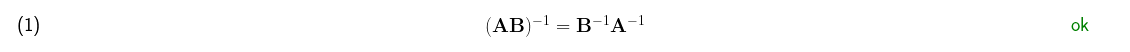

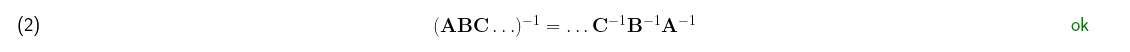

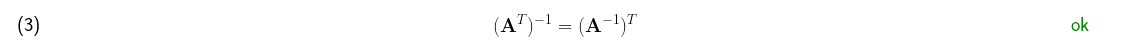

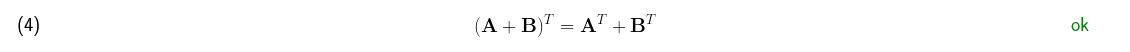

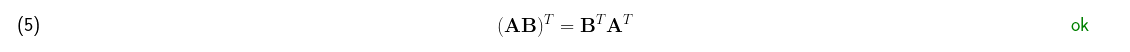

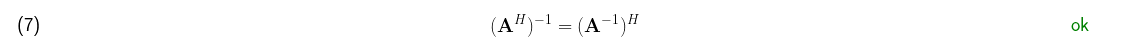

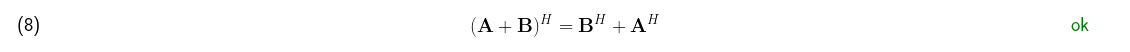

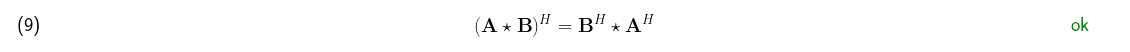

In [4]:

# equation 1:
lft_hand = np.linalg.inv(A.dot(B))
rgt_hand = np.dot(np.linalg.inv(B), np.linalg.inv(A))
validate(lft_hand, rgt_hand, 1, r"$(\mathbf{A}\mathbf{B})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$")

# equation 2:
lft_hand = np.linalg.inv(A.dot(B).dot(C))
rgt_hand = np.dot(np.linalg.inv(C), np.linalg.inv(B)).dot(np.linalg.inv(A))
validate(lft_hand, rgt_hand, 2, r"$(\mathbf{ABC\ldots})^{-1} = \ldots\mathbf{C}^{-1}\mathbf{B}^{-1}\mathbf{A}^{-1}$")

# equation 3:
lft_hand = np.linalg.inv(A.T)
rgt_hand = np.transpose(np.linalg.inv(A))
validate(lft_hand, rgt_hand, 3, r"$(\mathbf{A}^{T})^{-1} = (\mathbf{A}^{-1})^{T}$")

# equation 4:
lft_hand = (A+B).T
rgt_hand = A.T+B.T
validate(lft_hand, rgt_hand, 4, r"$(\mathbf{A} + \mathbf{B})^{T} = \mathbf{A}^{T} + \mathbf{B}^{T}$")

# equation 5:
lft_hand = A.dot(B).T
rgt_hand = B.T.dot(A.T)
validate(lft_hand, rgt_hand, 5, r"$(\mathbf{AB})^{T} = \mathbf{B}^{T}\mathbf{A}^{T}$")

# equation 7:
lft_hand = np.linalg.inv(np.conjugate(A))
rgt_hand = np.conjugate(np.linalg.inv(A))
validate(lft_hand, rgt_hand, 7, r"$(\mathbf{A}^{H})^{-1} = (\mathbf{A}^{-1})^{H}$")

# equation 8:
lft_hand = np.conjugate(A+B)
rgt_hand = np.conjugate(A) + np.conjugate(B)
validate(lft_hand, rgt_hand, 8, r"$(\mathbf{A} + \mathbf{B})^{H} = \mathbf{B}^{H} + \mathbf{A}^{H}$")

# equation 9:
lft_hand = np.conjugate(A*B)
rgt_hand = np.conjugate(B)*np.conjugate(A)
validate(lft_hand, rgt_hand, 9, r"$(\mathbf{A \star B})^{H} = \mathbf{B}^{H} \star \mathbf{A}^{H} $")

### 1.1 Trace
$$\begin{align} Tr(\mathbf{A}) &= \sum_{i} \mathbf{A}_{ii} \\ Tr(\mathbf{A}) &= \sum_{i}\lambda_{i}, \;\;\lambda_{i} = eig(\mathbf{A}) \\ Tr(\mathbf{A}) &= Tr(\mathbf{A}^{T}) \\ Tr(\mathbf{AB}) &= Tr(\mathbf{BA}) \\ Tr(\mathbf{A}+\mathbf{B}) &= Tr(\mathbf{A}) + Tr(\mathbf{B}) \\ Tr(\mathbf{ABC}) &= Tr(\mathbf{BCA}) = Tr(\mathbf{CAB}) \\ \vec{a}^{T}\vec{a} &= Tr(\vec{a}\vec{a}^{T}) \end{align}$$

#### 1.1 Trace Proofs

- equation (11):$Tr(\mathbf{A}) = \sum_{i} \mathbf{A}_{ii}$
By definition of trace of the matrix, which is the sum of elements on the main diagonal of $\mathbf{A}$.

---

- equation (12):$Tr(\mathbf{A}) = \sum_{i}\lambda_{i}, \;\;\lambda_{i} = eig(\mathbf{A})$
By definition, the characteristic polynomial of an $n \times n$ matrix $\mathbf{A}$ is given by
$$p(t) = \operatorname{det}(\mathbf{A-tI}) = (-1)^n \Big( t^n - (\operatorname{tr}\mathbf A)t^{n-1} + \cdots + (-1)^n \operatorname{det}\mathbf{A} \Big)$$
On the other hand, $p(t)=(−1)^n(t−\lambda_1)\cdots(t−\lambda_n)$, where the $\lambda_j$ are the eigenvalues of $\mathbf A$. So, comparing coefficients, we have $\operatorname{tr}\mathbf A=\lambda_1+\cdots+\lambda_n$.

---

- equation (13):$Tr(\mathbf{A}) = Tr(\mathbf{A}^{T})$
Elements of any matrix $\mathbf{A}$ can be represented by $\mathbf{A}_{ij}$. After transpose, the corresponding becomes $\mathbf{A}_{ji}$. But for diagonal elements, $i=j$, therefore, from definition of trace of matrix $\operatorname{Tr}(\mathbf A)=\operatorname{Tr}(\mathbf A^T)= \sum_i \mathbf A_{ii}$

---

- equation (14):$Tr(\mathbf{AB}) = Tr(\mathbf{BA})$
Let $\mathbf{A}$ be a $n \times m$ and \mathbf{B} be a $m \times n$ matrix, we have
$$\begin{aligned}\operatorname{Tr}(\mathbf {AB}) &= \sum_{i=1}^n(\mathbf{AB})_{ii} \\&=\sum_{i=1}^n\sum_{j=1}^m \mathbf {A}_{ij} \mathbf {B}_{ji} \\&= \sum_{j=1}^m\sum_{i=1}^n \mathbf {B}_{ji} \mathbf {A}_{ij} \\&= \sum_{j=1}^m(\mathbf{BA})_{jj} \\&= \operatorname{Tr}(\mathbf{BA})\end{aligned}$$

---

- equation (15):$Tr(\mathbf{A}+\mathbf{B}) = Tr(\mathbf{A}) + Tr(\mathbf{B})$
$$\begin{aligned}RHS &= \operatorname{Tr}(\mathbf A) + \operatorname{Tr}(\mathbf B) \\&=\sum_{k=1}^na_{kk} + \sum_{k=1}^nb_{kk} \\&=\sum_{k=1}^n(a_{kk} + b_{kk}) \\&= \operatorname{Tr}(\mathbf{A}+\mathbf{B}) \\&=LHS \end{aligned}$$

---

- equation (16):$Tr(\mathbf{ABC}) = Tr(\mathbf{BCA}) = Tr(\mathbf{CAB})$
More general form of (proof 14).

---

- equation (17):$\mathbf{a^Ta} = Tr(\mathbf{aa^T})$

#### 1.1 Trace Validate

$Tr(\mathbf{A}) = \sum_{i} \mathbf{A}_{ii}$

$Tr(\mathbf{A}) = \sum_{i}\lambda_{i}, \;\;\lambda_{i} = eig(\mathbf{A})$

$Tr(\mathbf{A}) = Tr(\mathbf{A}^{T})$

$Tr(\mathbf{AB}) = Tr(\mathbf{BA})$

$Tr(\mathbf{A}+\mathbf{B}) = Tr(\mathbf{A}) + Tr(\mathbf{B})$

$Tr(\mathbf{ABC}) = Tr(\mathbf{BCA}) = Tr(\mathbf{CAB})$

$\vec{a}^{T}\vec{a} = Tr(\vec{a}\vec{a}^{T})$

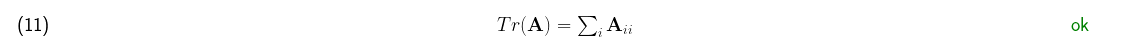

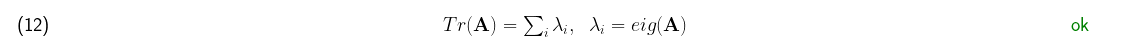

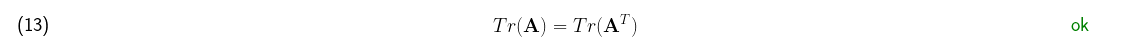

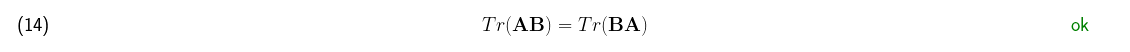

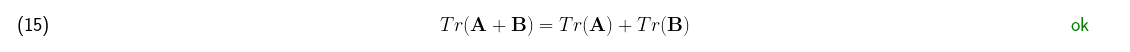

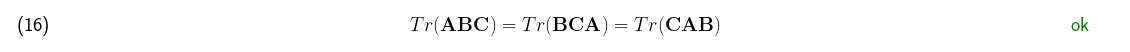

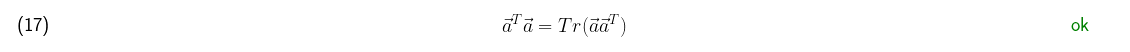

In [5]:

# equation 11:
lft_hand = np.trace(A)
rgt_hand = np.sum(np.diag(A))
validate(lft_hand, rgt_hand, 11, r"$Tr(\mathbf{A}) = \sum_{i} \mathbf{A}_{ii}$")

# equation 12:
lft_hand = np.trace(A)
rgt_hand = np.sum(np.linalg.eigvals(A))
validate(lft_hand, rgt_hand, 12, r"$Tr(\mathbf{A}) = \sum_{i}\lambda_{i}, \;\;\lambda_{i} = eig(\mathbf{A})$")

# equation 13:
lft_hand = np.trace(A)
rgt_hand = np.trace(A.T)
validate(lft_hand, rgt_hand, 13, r"$Tr(\mathbf{A}) = Tr(\mathbf{A}^{T})$")

# equation 14:
lft_hand = np.trace(A.dot(B))
rgt_hand = np.trace(B.dot(A))
validate(lft_hand, rgt_hand, 14, r"$Tr(\mathbf{AB}) = Tr(\mathbf{BA})$")

# equation 15:
lft_hand = np.trace(A+B)
rgt_hand = np.trace(A) + np.trace(B)
validate(lft_hand, rgt_hand, 15, r"$Tr(\mathbf{A}+\mathbf{B}) = Tr(\mathbf{A}) + Tr(\mathbf{B})$")

# equation 16:
lft_hand = np.trace(np.dot(A.dot(B), C))
rgt_hand = np.trace(np.dot(B.dot(C), A))
validate(lft_hand, rgt_hand, 16, r"$Tr(\mathbf{ABC}) = Tr(\mathbf{BCA}) = Tr(\mathbf{CAB})$")

# equation 17:
lft_hand = np.dot(a.T, a)
rgt_hand = np.trace(np.dot(a, a.T))
validate(lft_hand, rgt_hand, 17, r"$\vec{a}^{T}\vec{a} = Tr(\vec{a}\vec{a}^{T})$")

### 1.2 Determinant
Let $A$ be an $n \times n$ matrix.
$$\begin{align} \mathrm{det}(\mathbf{A}) &= \prod_i{\lambda_i} \quad \lambda_i=\mathrm{eig}(\mathbf{A})\\ \mathrm{det}(c\mathbf{A}) &=c^n \mathrm{det}(\mathbf{A}), \quad \text{if } \mathbf{A} \in \mathbb{R}^{n \times n} \\ \mathrm{det}(\mathbf{A}^T) &=\mathrm{det}(\mathbf{A}) \\ \mathrm{det}(\mathbf{AB}) &=\mathrm{det}(\mathbf{A})\mathrm{det}(\mathbf{B}) \\ \mathrm{det}(\mathbf{A}^{-1}) &= 1/\mathrm{det}(\mathbf{A}) \\ \mathrm{det}(\mathbf{A}^{n}) &= \mathrm{det}(\mathbf{A})^n \\ \mathrm{det}(\mathbf{I+uv^T}) &= 1+\mathbf{u^Tv} \\ \end{align}$$

For $n=2$:

$$\begin{align} \mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A}) \end{align}$$

For $n=3$:

$$\begin{align} \mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})+\frac{1}{2}\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\mathrm{Tr}(\mathbf{A}^2) \end{align}$$

For $n=4$:

$$\begin{equation}\begin{aligned} \mathrm{det}(\mathbf{I+A}) =\; &1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})\\ &+\frac{1}{2}\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\mathrm{Tr}(\mathbf{A}^2)\\ &+\frac{1}{6}\mathrm{Tr}(\mathbf{A})^3-\frac{1}{2}\mathrm{Tr}(\mathbf{A})\mathrm{Tr}(\mathbf{A}^2)+\frac{1}{3}\mathrm{Tr}(\mathbf{A}^3) \\ \end{aligned}\end{equation}$$

For small $\varepsilon$, the following approximation holds
对于小$\varepsilon$，以下近似成立

$$\begin{align} \mathrm{det}(\mathbf{I+\varepsilon A}) \cong 1+\mathrm{det}(\mathbf{A})+\varepsilon\mathrm{Tr}(\mathbf{A})+\frac{1}{2}\varepsilon^2\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\varepsilon^2\mathrm{Tr}(\mathbf{A}^2) \end{align}$$


#### 1.2 Determinant Validate

$\mathrm{det}(\mathbf{A}) = \prod_i{\lambda_i} \quad \lambda_i=\mathrm{eig}(\mathbf{A})$

$\mathrm{det}(c\mathbf{A}) = c^n \mathrm{det}(\mathbf{A}), \quad \text{if } \mathbf{A} \in \mathbb{R}^{n \times n}$

$\mathrm{det}(\mathbf{A}^T) = \mathrm{det}(\mathbf{A})$

$\mathrm{det}(\mathbf{AB}) =\mathrm{det}(\mathbf{A})\mathrm{det}(\mathbf{B})$

$\mathrm{det}(\mathbf{A}^{-1}) = 1/\mathrm{det}(\mathbf{A})$

$\mathrm{det}(\mathbf{A}^{n}) = \mathrm{det}(\mathbf{A})^n$

$\mathrm{det}(\mathbf{I+uv^T}) = 1+\mathbf{u^Tv}$

For $n=2$: $\mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})$

For $n=3$: $\mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})+\frac{1}{2}\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\mathrm{Tr}(\mathbf{A}^2)$

For $n=4$: $\mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})  +\frac{1}{2}\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\mathrm{Tr}(\mathbf{A}^2)  +\frac{1}{6}\mathrm{Tr}(\mathbf{A})^3-\frac{1}{2}\mathrm{Tr}(\mathbf{A})\mathrm{Tr}(\mathbf{A}^2)+\frac{1}{3}\mathrm{Tr}(\mathbf{A}^3)$

(28)  1.0000000230135486 = 0.8651635248813441


$\mathrm{det}(\mathbf{I+\varepsilon A}) \cong 1+\mathrm{det}(\mathbf{A})+\varepsilon\mathrm{Tr}(\mathbf{A})+\frac{1}{2}\varepsilon^2\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\varepsilon^2\mathrm{Tr}(\mathbf{A}^2)$

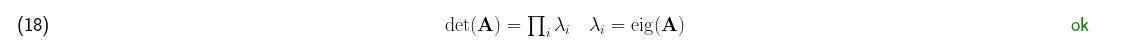

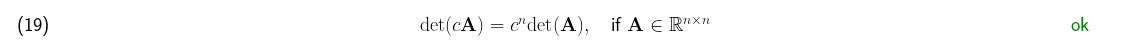

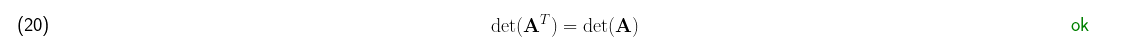

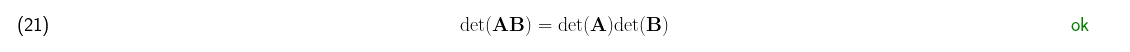

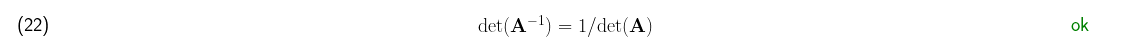

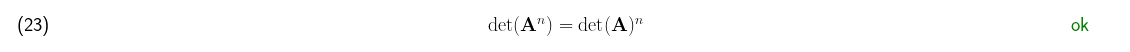

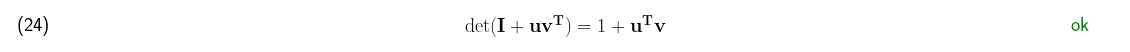

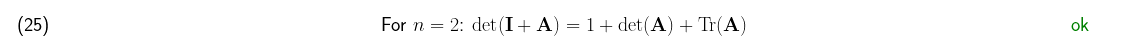

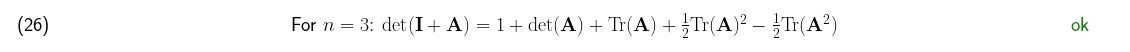

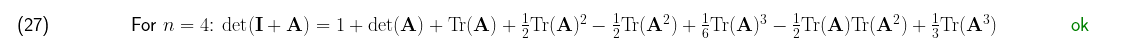

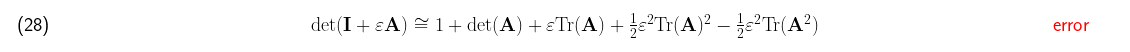

In [6]:

# equation 18:
lft_hand = np.linalg.det(A)
rgt_hand = np.prod(np.linalg.eigvals(A))
validate(lft_hand, rgt_hand, 18, r"$\mathrm{det}(\mathbf{A}) = \prod_i{\lambda_i} \quad \lambda_i=\mathrm{eig}(\mathbf{A})$")

# equation 19:
c = 1.23
lft_hand = np.linalg.det(c*A)
rgt_hand =np.power(c,A.shape[0])*np.linalg.det(A)
validate(lft_hand, rgt_hand, 19, r"$\mathrm{det}(c\mathbf{A}) = c^n \mathrm{det}(\mathbf{A}), \quad \text{if } \mathbf{A} \in \mathbb{R}^{n \times n}$")

# equation 20:
lft_hand = np.linalg.det(A.T)
rgt_hand = np.linalg.det(A)
validate(lft_hand, rgt_hand, 20, r"$\mathrm{det}(\mathbf{A}^T) = \mathrm{det}(\mathbf{A})$")

# equation 21:
lft_hand = np.linalg.det(A.dot(B))
rgt_hand = np.linalg.det(A) * np.linalg.det(B)
validate(lft_hand, rgt_hand, 21, r"$\mathrm{det}(\mathbf{AB}) =\mathrm{det}(\mathbf{A})\mathrm{det}(\mathbf{B})$")

# equation 22:
lft_hand = np.linalg.det(np.linalg.inv(A))
rgt_hand = 1.0/np.linalg.det(A)
validate(lft_hand, rgt_hand, 22, r"$\mathrm{det}(\mathbf{A}^{-1}) = 1/\mathrm{det}(\mathbf{A})$")


# equation 23:
n = 5
lft_hand = np.linalg.det(np.linalg.matrix_power(A, n))
rgt_hand = np.power(np.linalg.det(A), n) 
validate(lft_hand, rgt_hand, 23, r"$\mathrm{det}(\mathbf{A}^{n}) = \mathrm{det}(\mathbf{A})^n$")


# equation 24:
lft_hand = np.linalg.det(I + u.dot(v.T))
rgt_hand = 1 + u.T.dot(v)
validate(lft_hand, rgt_hand, 24, r"$\mathrm{det}(\mathbf{I+uv^T}) = 1+\mathbf{u^Tv}$")

# equation 25:
lft_hand = np.linalg.det(I2 + A2)
rgt_hand = 1 + np.linalg.det(A2) + np.trace(A2)
validate(lft_hand, rgt_hand, 25, r"For $n=2$: $\mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})$")

# equation 26:
lft_hand = np.linalg.det(I + A)
rgt_hand = 1 + np.linalg.det(A) + np.trace(A) + 0.5*np.power(np.trace(A),2) - 0.5*np.trace(np.linalg.matrix_power(A,2))
validate(lft_hand, rgt_hand, 26, r"For $n=3$: $\mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})+\frac{1}{2}\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\mathrm{Tr}(\mathbf{A}^2)$")

# equation 27:
lft_hand = np.linalg.det(I4 + A4)
rgt_hand = 1 + np.linalg.det(A4) + np.trace(A4) + 0.5*np.power(np.trace(A4),2) - 0.5*np.trace(np.linalg.matrix_power(A4,2)) +1/6 * np.power(np.trace(A4),3) - 0.5*np.trace(A4)*np.trace(np.linalg.matrix_power(A4,2)) +1/3*np.trace(np.linalg.matrix_power(A4,3))
validate(lft_hand, rgt_hand, 27, r"For $n=4$: $\mathrm{det}(\mathbf{I+A}) = 1+\mathrm{det}(\mathbf{A})+\mathrm{Tr}(\mathbf{A})  +\frac{1}{2}\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\mathrm{Tr}(\mathbf{A}^2)  +\frac{1}{6}\mathrm{Tr}(\mathbf{A})^3-\frac{1}{2}\mathrm{Tr}(\mathbf{A})\mathrm{Tr}(\mathbf{A}^2)+\frac{1}{3}\mathrm{Tr}(\mathbf{A}^3)$")

# equation 28:
varepsilon = 1e-8
lft_hand = np.linalg.det(I + varepsilon*A)
rgt_hand = 1 + np.linalg.det(A) + varepsilon*np.trace(A) + 0.5*np.power(varepsilon,2)*np.power(np.trace(A),2) - 0.5*np.power(varepsilon,2)*np.trace(np.linalg.matrix_power(A,2))
validate(lft_hand, rgt_hand, 28, r"$\mathrm{det}(\mathbf{I+\varepsilon A}) \cong 1+\mathrm{det}(\mathbf{A})+\varepsilon\mathrm{Tr}(\mathbf{A})+\frac{1}{2}\varepsilon^2\mathrm{Tr}(\mathbf{A})^2-\frac{1}{2}\varepsilon^2\mathrm{Tr}(\mathbf{A}^2)$")


### 1.3 The Special Case 2x2 (特殊情况)
Consider the matrix $\mathbf{A}$

$$\mathbf{A} = \begin{bmatrix} \mathbf{A}_{11} & \mathbf{A}_{12} \\ \mathbf{A}_{21} & \mathbf{A}_{22} \end{bmatrix}$$

Determinant and trace

$$\begin{align} \mathrm{det}(\mathbf{A})  &= \mathbf{A}_{11}\mathbf{A}_{22} - \mathbf{A}_{12}\mathbf{A}_{21} \\  \mathrm{Tr}(\mathbf{A})  &= \mathbf{A}_{11}+\mathbf{A}_{22}\end{align}$$

Eigenvalues

$$\lambda^2 - \lambda \cdot  \mathrm{Tr}(\mathbf{A}) + \mathrm{det}(\mathbf{A}) = 0 \\ \lambda_1 = \frac{\mathrm{Tr}(\mathbf{A}) + \sqrt{\mathrm{Tr}(\mathbf{A})^2 - 4\mathrm{det}(\mathbf{A})}}{2} \quad \lambda_2 = \frac{\mathrm{Tr}(\mathbf{A}) - \sqrt{\mathrm{Tr}(\mathbf{A})^2 - 4\mathrm{det}(\mathbf{A})}}{2} \\ \lambda_1 + \lambda_2 = \mathrm{Tr}(\mathbf{A}) \quad \lambda_1  \lambda_2 =\mathrm{det}(\mathbf{A})$$

Eigenvectors

$$\mathbf{v}_1 \propto \begin{bmatrix} \mathbf{A}_{12} \\ \lambda_1-\mathbf{A}_{11} \end{bmatrix} \quad \mathbf{v}_2 \propto \begin{bmatrix} \mathbf{A}_{12} \\ \lambda_2-\mathbf{A}_{11} \end{bmatrix}$$

Inverse

$$\begin{align} \mathbf{A}^{-1} = \frac{1}{\mathrm{det}(\mathbf{A})} \begin{bmatrix} \mathbf{A}_{22} & -\mathbf{A}_{12} \\ -\mathbf{A}_{21} & \mathbf{A}_{11} \end{bmatrix} \end{align}$$

## 2 Derivatives

In [7]:
from sympy import MatrixSymbol, Inverse, symbols, Determinant, Trace, Derivative
from sympy import MatAdd, Identity, MatMul

In [8]:
# k = symbols("k")

# X = MatrixSymbol("X", k, k)
# x = MatrixSymbol("x", k, 1)

# A = MatrixSymbol("A", k, k)
# B = MatrixSymbol("B", k, k)
# C = MatrixSymbol("C", k, k)
# D = MatrixSymbol("D", k, k)

# a = MatrixSymbol("a", k, 1)
# b = MatrixSymbol("b", k, 1)
# c = MatrixSymbol("c", k, 1)
# d = MatrixSymbol("d", k, 1)

In [9]:
# 把assert 都去掉了
# A.diff(A) == Derivative(A, A)

# A.T.diff(A) == Derivative(A.T, A)

# (2*A).diff(A) == Derivative(2*A, A)

# MatAdd(A, A).diff(A) == Derivative(MatAdd(A, A), A)

# (A + B).diff(A) == Derivative(A + B, A)

In [ ]:
# #------------matrix_derivative_trivial
# # equation 33:
# rgt_hand = 0
# lft_hand = X.diff(A)

# #------------matrix_derivative_vectors_and_scalars
# # Cookbook example 69:
# expr = x.T*a
# expr.diff(x) == a
# expr = a.T*x
# expr.diff(x) == a

## Cookbook example 70:
# expr = a.T*X*b
# expr.diff(X) == a*b.T

# # Cookbook example 71:
# expr = a.T*X.T*b
# expr.diff(X) == b*a.T

# # Cookbook example 77:
# expr = b.T*X.T*X*c
# expr.diff(X) == X*b*c.T + X*c*b.T

# # Cookbook example 78:
# expr = (B*x + b).T*C*(D*x + d)
# expr.diff(x) == B.T*C*(D*x + d) + D.T*C.T*(B*x + b)

# # Cookbook example 81:
# expr = x.T*B*x
# expr.diff(x) == B*x + B.T*x

# # Cookbook example 82:
# expr = b.T*X.T*D*X*c
# expr.diff(X) == D.T*X*b*c.T + D*X*c*b.T

# # Cookbook example 83:
# expr = (X*b + c).T*D*(X*b + c)
# expr.diff(X) == D*(X*b + c)*b.T + D.T*(X*b + c)*b.T


# #-----------matrix_derivative_with_inverse
# # Cookbook example 61:
# expr = a.T*Inverse(X)*b
# expr.diff(X) == -Inverse(X).T*a*b.T*Inverse(X).T

# # Cookbook example 63:
# expr = Trace(A*Inverse(X)*B)
# expr.diff(X) == -(X**(-1)*B*A*X**(-1)).T

# # Cookbook example 64:
# expr = Trace(Inverse(X + A))
# expr.diff(X) == -(Inverse(X + A)).T**2

In [ ]:
# #---------------matrix_derivatives_of_traces
# # First order:

# # Cookbook example 99:
# expr = Trace(X)
# expr.diff(X) == Identity(k)

# # Cookbook example 100:
# expr = Trace(X*A)
# expr.diff(X) == A.T

# # Cookbook example 101:
# expr = Trace(A*X*B)
# expr.diff(X) == A.T*B.T

# # Cookbook example 102:
# expr = Trace(A*X.T*B)
# expr.diff(X) == B*A

# # Cookbook example 103:
# expr = Trace(X.T*A)
# expr.diff(X) == A

# # Cookbook example 104:
# expr = Trace(A*X.T)
# expr.diff(X) == A

# # Cookbook example 105:
# # TODO: TensorProduct is not supported
# #expr = Trace(TensorProduct(A, X))
# #expr.diff(X) == Trace(A)*Identity(k)

# ## Second order:

# # Cookbook example 106:
# expr = Trace(X**2)
# expr.diff(X) == 2*X.T

# # Cookbook example 107:
# expr = Trace(X**2*B)
# # TODO: wrong result
# #expr.diff(X) == (X*B + B*X).T
# expr = Trace(MatMul(X, X, B))
# expr.diff(X) == (X*B + B*X).T

# # Cookbook example 108:
# expr = Trace(X.T*B*X)
# expr.diff(X) == B*X + B.T*X

# # Cookbook example 109:
# expr = Trace(B*X*X.T)
# expr.diff(X) == B*X + B.T*X

# # Cookbook example 110:
# expr = Trace(X*X.T*B)
# expr.diff(X) == B*X + B.T*X

# # Cookbook example 111:
# expr = Trace(X*B*X.T)
# expr.diff(X) == X*B.T + X*B

# # Cookbook example 112:
# expr = Trace(B*X.T*X)
# expr.diff(X) == X*B.T + X*B

# # Cookbook example 113:
# expr = Trace(X.T*X*B)
# expr.diff(X) == X*B.T + X*B

# # Cookbook example 114:
# expr = Trace(A*X*B*X)
# expr.diff(X) == A.T*X.T*B.T + B.T*X.T*A.T

# # Cookbook example 115:
# expr = Trace(X.T*X)
# expr.diff(X) == 2*X
# expr = Trace(X*X.T)
# expr.diff(X) == 2*X

# # Cookbook example 116:
# expr = Trace(B.T*X.T*C*X*B)
# expr.diff(X) == C.T*X*B*B.T + C*X*B*B.T

# # Cookbook example 117:
# expr = Trace(X.T*B*X*C)
# expr.diff(X) == B*X*C + B.T*X*C.T

# # Cookbook example 118:
# expr = Trace(A*X*B*X.T*C)
# expr.diff(X) == A.T*C.T*X*B.T + C*A*X*B

# # Cookbook example 119:
# expr = Trace((A*X*B + C)*(A*X*B + C).T)
# expr.diff(X) == 2*A.T*(A*X*B + C)*B.T

# # Cookbook example 120:
# # TODO: no support for TensorProduct.
# # expr = Trace(TensorProduct(X, X))
# # expr = Trace(X)*Trace(X)
# # expr.diff(X) == 2*Trace(X)*Identity(k)